## 1. Data Pre-processing

In [ ]:
!pip install category_encoders

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report,accuracy_score, log_loss,precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading the csv file
df = pd.read_csv("./bank/bank-full.csv",sep=';')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Checking for null values
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [ ]:
# Replacing yes with 1 and no with 0
df.y = df.y.eq('yes').mul(1)
df.default = df.default.eq('no').mul(1) #NO default said yes, no =1, yes = 0
df.loan = df.loan.eq('no').mul(1) #NO loan said yes, no =1, yes = 0

df.housing = df.housing.eq('no').mul(1) #No housing said yes, no=1, yes = 0


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,1,1,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1,1729,1,1,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,1,5715,1,1,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,1,668,1,1,telephone,17,nov,508,4,-1,0,unknown,0


## 2. Ordinal Encoding

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['contact'],return_df=True,
                           mapping=[{'col':'contact',
'mapping':{'cellular':2, 'telephone':0, 'unknown':1}}])

In [ ]:
df[['contact']] = encoder.fit_transform(df[['contact']])

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['month'],return_df=True,
                           mapping=[{'col':'month',
'mapping':{'apr':9, 'aug':11, 'dec':1, 'feb':7, 'jan':2, 'jul':10, 'jun':8, 'mar':3, 'may':12,
       'nov':6, 'oct':5, 'sep':4}}])

In [ ]:
df[['month']] = encoder.fit_transform(df[['month']])

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['job'],return_df=True,
                           mapping=[{'col':'job',
'mapping':{'unemployed':5,'unknown':0,'student':6,'housemaid':1,'blue-collar':10,'technician':11,'services':7,
           'retired':8,'admin':9,'self-employed':4,'entrepreneur':3,'management':12}}])

In [ ]:
df[['job']] = encoder.fit_transform(df[['job']])

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['marital'],return_df=True,
                           mapping=[{'col':'marital',
'mapping':{'single':1,'divorced':0,'married':2}}])

In [ ]:
df[['marital']] = encoder.fit_transform(df[['marital']])

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'unknown':0,'primary':1,'secondary':3,'tertiary':2}}])

In [ ]:
df[['education']] = encoder.fit_transform(df[['education']])

In [ ]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['poutcome'],return_df=True,
                           mapping=[{'col':'poutcome',
'mapping':{'failure':1,'other':0,'unknown':3,'success':2}}])

In [ ]:
df[['poutcome']] = encoder.fit_transform(df[['poutcome']])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,12.0,2,2,1,2143,0,1,1,5,12,261,1,-1,0,3,0
1,44,11.0,1,3,1,29,0,1,1,5,12,151,1,-1,0,3,0
2,33,3.0,2,3,1,2,0,0,1,5,12,76,1,-1,0,3,0
3,47,10.0,2,0,1,1506,0,1,1,5,12,92,1,-1,0,3,0
4,33,0.0,1,0,1,1,1,1,1,5,12,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,11.0,2,2,1,825,1,1,2,17,6,977,3,-1,0,3,1
45207,71,8.0,0,1,1,1729,1,1,2,17,6,456,2,-1,0,3,1
45208,72,8.0,2,3,1,5715,1,1,2,17,6,1127,5,184,3,2,1
45209,57,10.0,2,3,1,668,1,1,0,17,6,508,4,-1,0,3,0


## 3. Correlation and Heat Map

In [ ]:
# Finding the correlation
corr_data = df.corr()
corr_y = corr_data["y"]
corr_y.sort_values(ascending = False)

y            1.000000
duration     0.394521
housing      0.139173
pdays        0.103621
contact      0.100822
previous     0.093236
loan         0.068185
balance      0.052838
age          0.025155
default      0.022419
job         -0.005085
education   -0.009795
day         -0.028348
marital     -0.043846
campaign    -0.073172
poutcome    -0.096257
month       -0.150419
Name: y, dtype: float64

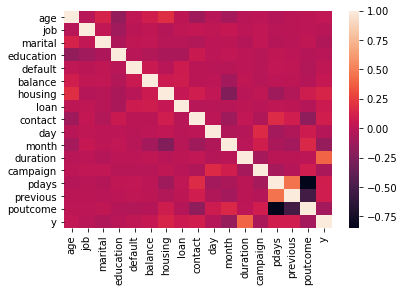

In [ ]:
# Displaying the Heat Map
sns.heatmap(df.corr())
plt.savefig("Heatmap.png")

## 4. Training and Testing the Data

In [ ]:
# training the dataset
X = df.drop("y", axis=1)
y = df["y"]

In [ ]:
#Checking weights of classes
class_weights = compute_class_weight('balanced', np.unique(y), y)
class_weights

C:\Users\kondr\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.56624167, 4.27405937])

In [ ]:
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implementing different models
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_train)
        acc = accuracy_score(y_train, train_predictions)
        print("Accuracy:\t{:.4%}".format(acc))
        print("ROC AUC:\t", roc_auc_score(y_train, train_predictions))
        print("Precision:\t",precision_score(y_train, train_predictions))
        print("F1 Score:\t",f1_score(y_train, train_predictions))
        print("Log Loss:\t",log_loss(y_train, train_predictions))
        print("Confusion Matrix: \n",confusion_matrix(y_train, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_train, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy:	100.0000%
ROC AUC:	 1.0
Precision:	 1.0
F1 Score:	 1.0
Log Loss:	 9.992007221626413e-16
Confusion Matrix: 
 [[31970     0]
 [    0  4198]]
RandomForestClassifier
****Results****
Accuracy:	100.0000%
ROC AUC:	 1.0
Precision:	 1.0
F1 Score:	 1.0
Log Loss:	 9.992007221626413e-16
Confusion Matrix: 
 [[31970     0]
 [    0  4198]]


C:\Users\kondr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy:	88.8493%
ROC AUC:	 0.5829725953479195
Precision:	 0.5593952483801296
F1 Score:	 0.2781456953642384
Log Loss:	 3.8513430257216896
Confusion Matrix: 
 [[31358   612]
 [ 3421   777]]
GradientBoostingClassifier
****Results****
Accuracy:	91.0142%
ROC AUC:	 0.6970276892805204
Precision:	 0.6841491841491841
F1 Score:	 0.5200826934435911
Log Loss:	 3.103618484742604
Confusion Matrix: 
 [[31157   813]
 [ 2437  1761]]
GaussianNB
****Results****
Accuracy:	84.1296%
ROC AUC:	 0.673604631426288
Precision:	 0.35626398210290827
F1 Score:	 0.3997071742313324
Log Loss:	 5.481512317980363
Confusion Matrix: 
 [[28517  3453]
 [ 2287  1911]]


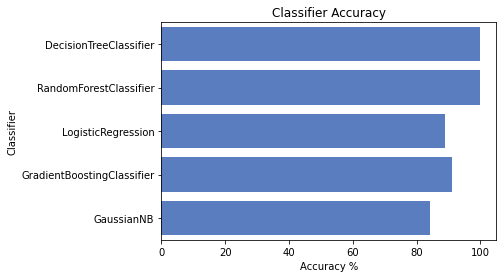

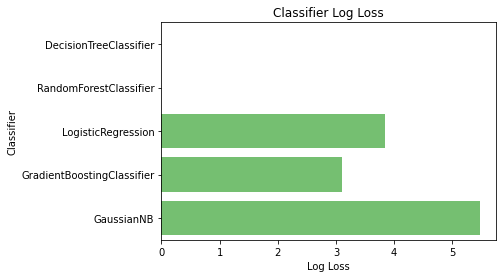

In [ ]:
# Comparison between Classifier Accuracy and Log loss on train data
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.savefig("TrainACC.png")
plt.show()


sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.savefig("TrainLog.png")
plt.show()

In [ ]:
# Testing all models
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        test_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, test_predictions)
        print("Accuracy:\t{:.4%}".format(acc))
        print("ROC AUC:\t", roc_auc_score(y_test, test_predictions))
        print("Precision:\t",precision_score(y_test, test_predictions))
        print("F1 Score:\t",f1_score(y_test, test_predictions))
        print("Log Loss:\t",log_loss(y_test, test_predictions))
        print("Confusion Matrix: \n",confusion_matrix(y_test, test_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, test_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy:	87.2830%
ROC AUC:	 0.7038846276559448
Precision:	 0.4733994589720469
F1 Score:	 0.4772727272727273
Log Loss:	 4.392354287188601
Confusion Matrix: 
 [[7368  584]
 [ 566  525]]
RandomForestClassifier
****Results****
Accuracy:	90.2024%
ROC AUC:	 0.6932003916256475
Precision:	 0.6449787835926449
F1 Score:	 0.507230255839822
Log Loss:	 3.3840049303158075
Confusion Matrix: 
 [[7701  251]
 [ 635  456]]


C:\Users\kondr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy:	88.3999%
ROC AUC:	 0.5825152565254035
Precision:	 0.5580110497237569
F1 Score:	 0.27804542326221615
Log Loss:	 4.0065580420048805
Confusion Matrix: 
 [[7792  160]
 [ 889  202]]
GradientBoostingClassifier
****Results****
Accuracy:	90.1360%
ROC AUC:	 0.6841239347173785
Precision:	 0.648729446935725
F1 Score:	 0.49318181818181817
Log Loss:	 3.4069198772151306
Confusion Matrix: 
 [[7717  235]
 [ 657  434]]
GaussianNB
****Results****
Accuracy:	83.7333%
ROC AUC:	 0.6722339075700766
Precision:	 0.36151603498542273
F1 Score:	 0.40276086073893624
Log Loss:	 5.618405454413631
Confusion Matrix: 
 [[7076  876]
 [ 595  496]]


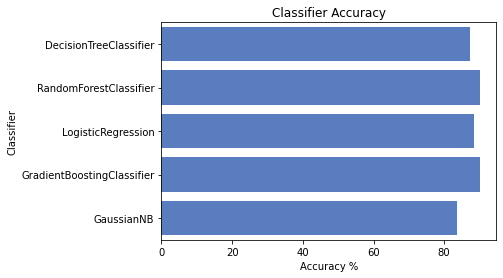

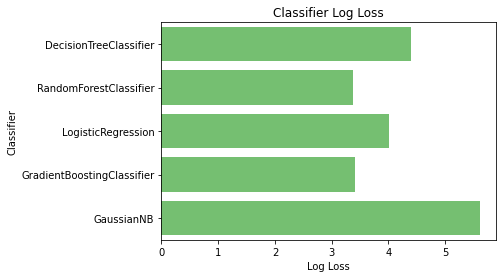

In [ ]:
# Comparison between Classifier Accuracy and Log loss on test data
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.savefig("TestACC.png")
plt.show()


sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.savefig("TestLog.png")
plt.show()

## SMOTE

In [ ]:
#Implementing SMOTE (oversampling minority class in data)

## Normalize data
sc_X = StandardScaler()
X_train_norm = sc_X.fit_transform(X_train)
X_test_norm = sc_X.transform(X_test)

## SMOTE only on training data
# sm = SMOTE(sampling_strategy='all')
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

## Hyperparameter Tuning

In [ ]:
def met(model,X_train1,y_train1,X_test1,y_test1):
  model.fit(X_train1,y_train1)

  print('................Train .......................')

  y_train_pred=model.predict(X_train1)
  print(accuracy_score(y_train1, y_train_pred), ": is the accuracy score")
  print(roc_auc_score(y_train1, y_train_pred), ": is the roc auc score")
  print(precision_score(y_train1, y_train_pred), ": is the precision score")
  print(f1_score(y_train1, y_train_pred), ": is the f1 score")
  print(log_loss(y_train1, y_train_pred), ": is the logloss")
  print(confusion_matrix(y_train1, y_train_pred), ": is the confusion matrix")

  print('................Test.......................')

  y_pred=model.predict(X_test1)
  print(accuracy_score(y_test1, y_pred), ": is the accuracy score")
  print(roc_auc_score(y_test1, y_pred), ": is the roc auc score")
  print(precision_score(y_test1, y_pred), ": is the precision score")
  print(f1_score(y_test1, y_pred), ": is the f1 score")
  print(log_loss(y_test1, y_pred), ": is the logloss")
  print(confusion_matrix(y_test1, y_pred), ": is the confusion matrix")

### 1. Decision Tree

In [ ]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range (1,10),
    "min_samples_split":range (1,10),
    "min_samples_leaf":range (1,5)
}

#After grid search on SMOTE
# {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
#After grid search on SMOTE, balanced
# {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
######


In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(class_weight = "balanced"),
                    param_grid=param_dict,
                    cv = 5 ,
                    verbose = 1 ,
                    scoring = 'roc_auc',
                    n_jobs=-1)

grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\kondr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636
 0.72411636 0.72411636 0.72411636        nan 0.72411636 0.72411636
 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636
        nan 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636
 0.72411636 0.72411636 0.72411636        nan 0.72411636 0.72411636
 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636 0.72411636
        nan 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908
 0.79633908 0.79633908 0.79633908        nan 0.79633908 0.79633908
 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908
        nan 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908
 0.79633908 0.79633908 0.79633908        nan 0.79633908 0.79633908
 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908 0.79633908
        nan 0.84122798 0.84122798 0.84122798 0.841227

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

In [ ]:
print('Best Params: ', grid.best_params_)

Best Params:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [ ]:
print('Best Score: ', grid.best_score_)

Best Score:  0.9436943372095106


In [ ]:
# Best Params:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [ ]:
model = DecisionTreeClassifier(criterion= 'entropy',
                               max_depth= 9,
                               min_samples_leaf= 4,
                               min_samples_split= 3,
                               class_weight = "balanced"
                              )

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
0.8784641851736003 : is the accuracy score
0.8784641851736003 : is the roc auc score
0.8764740657767821 : is the precision score
0.8787845700291691 : is the f1 score
4.197747978834045 : is the logloss
[[28000  3970]
 [ 3801 28169]] : is the confusion matrix
................Test.......................
0.8517085038151057 : is the accuracy score
0.8101050159803921 : is the roc auc score
0.43414120126448896 : is the precision score
0.551354968216795 : is the f1 score
5.121901792902274 : is the logloss
[[6878 1074]
 [ 267  824]] : is the confusion matrix


### 2. Random Forest

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20],
    'min_samples_leaf': [3,4],
    'min_samples_split': [3,4],
    'n_estimators': [1350, 1400, 1450, 1500, 1550, 1600, 1650]
}

# Create a based model
rf = RandomForestClassifier(max_features = 4, class_weight = "balanced")

# Instantiate the grid search model
grid = GridSearchCV(estimator = rf,
                           param_grid = param_grid, 
                           cv = 5,
                           scoring = 'roc_auc',
                           n_jobs = -1, 
                           verbose = 1)

#Before
#  {'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1150}
#No tuning
#  {'bootstrap': True, 'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1300}
# best score 0.8943
#After final tuning
# {'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 1350}

In [ ]:
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features=4),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 20],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [1350, 1400, 1450, 1500, 1550, 1600,
                                          1650]},
             scoring='roc_auc', verbose=1)

In [ ]:
print('Best Score: ', grid.best_score_)

Best Score:  0.9885726951751079


In [ ]:
print('Best Params: ', grid.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1450}


In [ ]:
# Best Params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1450}

In [ ]:
rfc = RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 4, 
                               n_estimators = 1450,
                            class_weight = "balanced")

In [ ]:
met(rfc, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
0.9824679386925242 : is the accuracy score
0.9824679386925242 : is the roc auc score
0.9742935334091818 : is the precision score
0.9826177296056814 : is the f1 score
0.6055463997833371 : is the logloss
[[31134   836]
 [  285 31685]] : is the confusion matrix
................Test.......................
0.891850049762247 : is the accuracy score
0.809204389951072 : is the roc auc score
0.5399293286219081 : is the precision score
0.6097366320830008 : is the f1 score
3.735424510908958 : is the logloss
[[7301  651]
 [ 327  764]] : is the confusion matrix


### 3. Logistic Regression

In [ ]:
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga', 'lbfgs']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)

grid = GridSearchCV(estimator=LogisticRegression(class_weight = "balanced"),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)

#Parameter with smote and balanced data
#  {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
grid = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\kondr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8177281  0.8177281         nan 0.8766393  0.8762509  0.87624899
        nan        nan        nan 0.88101871 0.88112606        nan
 0.8816166  0.88136151 0.88136282        nan        nan        nan
 0.88238098 0.88233747        nan 0.8823097  0.88226541 0.88226645
        nan        nan        nan 0.88237432 0.88236831        nan
 0.88235253 0.88234633 0.88234834        nan        nan        nan
 0.88235835 0.88235703        nan 0.88235601 0.88235493 0.88235554
        nan        nan        nan 0.88235631 0.88235563        nan
 0.88235626 0.88235567 0.88235632        nan        nan        nan
 0.88235644 0.88235571        nan 0.88235624 0.88235565 0.88235644
        nan        nan        nan 0.88235611 0.88235699        nan
 0.88235624 0.88235615 0.88235646        nan        nan        nan]
  warnings.warn(


In [ ]:
print('Best Score: ', grid.best_score_)

Best Score:  0.8823809788442383


In [ ]:
print('Best Params: ', grid.best_params_)

Best Params:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
model = LogisticRegression(C=0.01, class_weight="balanced", penalty='l1', solver='liblinear')

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
0.8051767281826713 : is the accuracy score
0.8051767281826713 : is the roc auc score
0.8066249725007071 : is the precision score
0.80471554656759 : is the f1 score
6.729034367757122 : is the logloss
[[25817  6153]
 [ 6304 25666]] : is the confusion matrix
................Test.......................
0.8019462567731948 : is the accuracy score
0.794068201601912 : is the roc auc score
0.35477178423236516 : is the precision score
0.4884318766066838 : is the f1 score
6.840671447228683 : is the logloss
[[6397 1555]
 [ 236  855]] : is the confusion matrix


### 4. XGboost

In [ ]:
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    njob = -1,
    cv = 5,
    scoring = 'roc_auc',
    seed=42,
)

In [ ]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [ ]:
#Calculating values for scale_pos_weight
# FORMULA: scale_pos_weight = count(negative class)/count(positive class)

#scale_pos_weight=7.5481 #count(negative class)/count(positive class)
#scale_pos_weight=2.7473 #sqrt(count(negative class/count(positive class))

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'scale_pos_weight': [7.5481, 2.7473]
}

In [ ]:
grid = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    verbose=True
)

In [ ]:
grid.fit(X_train_smote, y_train_smote)

In [ ]:
print('Best Score: ', grid.best_score_)

Best Score:  0.9237879261807944


In [ ]:
print('Best Params: ', grid.best_params_)

Best Params:  {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 140, 'scale_pos_weight': 2.7473}


In [ ]:
# Best Params:  {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 140, 'scale_pos_weight': 2.7473}

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cv=5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=16, njob=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2.7473, scoring='roc_auc', seed=42, subsample=1,
              tree_method='exact', ...)

In [ ]:
model = XGBClassifier(cv=5,learning_rate=0.05, max_depth=9, n_estimators=140, njob=-1, scoring='roc_auc',
              seed=42, class_weight="balanced", scale_pos_weight= 2.7473)

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

[21:33:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "cv", "njob", "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
................Train .......................
0.954426024397873 : is the accuracy score
0.954426024397873 : is the roc auc score
0.9220801859384079 : is the precision score
0.9561078475674046 : is the f1 score
1.5741028923221387 : is the loglos

### 5. Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb, 
                            scoring = 'roc_auc',
                            verbose=1, 
                            cv=5, 
                            n_jobs=-1)

In [ ]:
nbModel_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=1)

In [ ]:
print(nbModel_grid.best_estimator_)

GaussianNB(var_smoothing=1.0)


In [ ]:
print('Best Score: ', nbModel_grid.best_score_)

Best Score:  0.8444752220690163


In [ ]:
print('Best Params: ', nbModel_grid.best_params_)

Best Params:  {'var_smoothing': 1.0}


In [ ]:
model = GaussianNB(var_smoothing=1.0)

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
0.7740850797622771 : is the accuracy score
0.7740850797622771 : is the roc auc score
0.7653614366615185 : is the precision score
0.7777384560939208 : is the f1 score
7.802921806465029 : is the logloss
[[24222  7748]
 [ 6697 25273]] : is the confusion matrix
................Test.......................
0.7569390688930665 : is the accuracy score
0.768872573202736 : is the roc auc score
0.3036537779354381 : is the precision score
0.43785166240409207 : is the f1 score
8.395200721637638 : is the logloss
[[5989 1963]
 [ 235  856]] : is the confusion matrix


## Hyperparameter Metrics :


In [ ]:
#Final models
classifiers = [
    DecisionTreeClassifier(criterion= 'entropy',
                               max_depth= 9,
                               min_samples_leaf= 4,
                               min_samples_split= 3,
                               class_weight = "balanced"
                              ),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 4, 
                               n_estimators = 1450,
                            class_weight = "balanced"),
    LogisticRegression(C=0.01, class_weight="balanced", penalty='l1', solver='liblinear'),
    XGBClassifier(cv=5,learning_rate=0.05, max_depth=9, n_estimators=140, njob=-1, scoring='roc_auc',
              seed=42, class_weight="balanced", scale_pos_weight= 2.7473),
    GaussianNB(var_smoothing=1.0)
]

# Logging for Visual Comparison
log_cols=["Classifier", "ROC"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_smote, y_train_smote)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print("-"*30)
        train_predictions_smote = clf.predict(X_train_smote)
        print("ROC AUC:\t",roc_auc_score(y_train_smote, train_predictions_smote))
        log_entry = pd.DataFrame([[name, roc_auc_score(y_train_smote, train_predictions_smote)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
------------------------------
ROC AUC:	 0.8784016265248671
RandomForestClassifier
------------------------------
ROC AUC:	 0.9824835783547075
LogisticRegression
------------------------------
ROC AUC:	 0.8051923678448545


C:\Users\kondr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "cv", "njob", "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
------------------------------
ROC AUC:	 0.954426024397873
GaussianNB
------------------------------
ROC AUC:	 0.7740850797622771


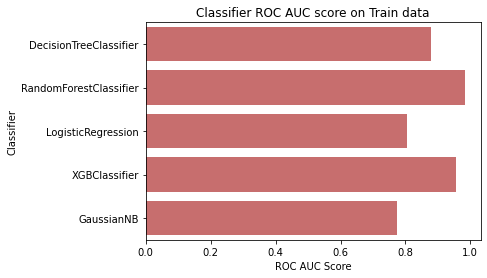

In [ ]:
# Ploting ROC AUC on train data
sns.set_color_codes("muted")
sns.barplot(x='ROC', y='Classifier', data=log, color="r")

plt.xlabel('ROC AUC Score')
plt.title('Classifier ROC AUC score on Train data')
plt.show()


In [ ]:
#Final models Test data
classifiers = [
    DecisionTreeClassifier(criterion= 'entropy',
                               max_depth= 9,
                               min_samples_leaf= 4,
                               min_samples_split= 3,
                               class_weight = "balanced"
                              ),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 4, 
                               n_estimators = 1450,
                            class_weight = "balanced"),
    LogisticRegression(C=0.01, class_weight="balanced", penalty='l1', solver='liblinear'),
    XGBClassifier(cv=5,learning_rate=0.05, max_depth=9, n_estimators=140, njob=-1, scoring='roc_auc',
              seed=42, class_weight="balanced", scale_pos_weight= 2.7473),
    GaussianNB(var_smoothing=1.0)
]

# Logging for Visual Comparison
log_cols=["Classifier", "ROC"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_smote, y_train_smote)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print("-"*30)
        test_predictions_smote = clf.predict(X_test_norm)
        print("ROC AUC:\t",roc_auc_score(y_test, test_predictions_smote))
        log_entry = pd.DataFrame([[name, roc_auc_score(y_test, test_predictions_smote)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
------------------------------
ROC AUC:	 0.8085233444664319
RandomForestClassifier
------------------------------
ROC AUC:	 0.8102648890593792
LogisticRegression
------------------------------
ROC AUC:	 0.794068201601912
[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "cv", "njob", "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kondr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
------------------------------
ROC AUC:	 0.8443195262316336
GaussianNB
------------------------------
ROC AUC:	 0.768872573202736


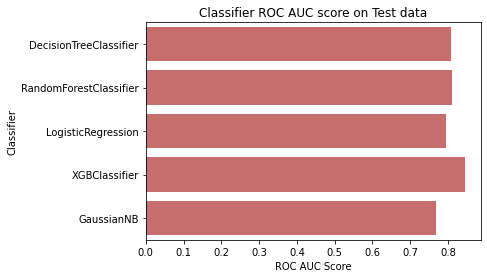

In [ ]:
# Ploting ROC AUC on test data
sns.set_color_codes("muted")
sns.barplot(x='ROC', y='Classifier', data=log, color="r")

plt.xlabel('ROC AUC Score')
plt.title('Classifier ROC AUC score on Test data')
plt.show()

# THE END